# ADA - Project
## Milestone 2 - Data collection and description
#### Olivier Couque, Emma Lejal Glaude & Matthieu Sauvé

In this notebook we will explore the different datasets that we retreived from the opendata.swiss website. All the files come from the Office Fédéral de la Statistique (OFS) which is a good news as it means that the format and names should be coherent throughout the files. You will find all the raw files in the data folder of the Github repository.<br>
__Files__ : 
1. charge-revenu.px
2. charges.px
3. cout-revenu.px
4. diplome-bourses.px
5. diplomes.px
6. etudiants-entrant.px
7. nb-bourses.px
8. nb-etudiants.px
9. pred-etudiants.px
10. staff.px

As described in the Readme file, the files are downloaded in a format named PC-AXIS. We found online a python module (that you will find in the Github repository) that allows us to parse the files into a Pandas Dataframe. Before doing so, we took care that the last comma of every file was on a new line so that the index proposed in the structure of the file matched the data. We also deleted the German names to have the French version of the index. <br>

The first thing to note is that we are dealing with numerical data in all files. There is no missing data, we have some zeros in case of unknown data.

For each file, we will adopt the following strategy : 
- Load file into a dataframe, rename the index, parse the numeric columns
- Apply the averages of all universities, all EPF and keep the values of EPFL and ETHZ
- Provide a function that returns the Dataframe for a given university
- Visualize the evolution over time of the data with a line graph and compare the two means

In [1]:
#Usefull imports
import pandas as pd
import px_reader as px
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Helpers functions

In [2]:
#Read a file given its name and return the corresponding Dataframe
def read_file(file):
    px_obj = px.Px('data/' + file)
    return px_obj.pd_dataframe()

In [3]:
#Parse a pandas serie of strings to float
def string_to_float(s):
    res = []
    val = -1
    for v in s:
        if v == '-':
            val = 0
        else:
            val = float(v.replace(';', ''))
        res.append(val)
    return res

In [4]:
#Parse the columns of a dataframe from string to float
def parse_df(df):
    for c in df.columns:
        df[c] = string_to_float(df[c])
    return df

In [5]:
#This functions computes the average values for the list of universties and for the 2 EPF
#We keep the 2 averages and the values of both EPF and return the modified Dataframe
def compute_avg(df):
    unis = list(df.columns)
    unis = [u for u in unis if u != 'EPFL' and u != 'ETHZ']
    df['Moy_EPF'] = df[['EPFL', 'ETHZ']].mean(axis = 1)
    df['Moy_UNI'] = np.round(df[unis].mean(axis = 1), 2)
    df = df.drop(unis, axis = 1)
    return df

## 1. Charge-revenu

In [6]:
#Load file
charge_revenu = read_file('charge-revenu.px')
charge_revenu.index.names = ['annee', 'categorie']
charge_revenu.head()

BS  \
annee categorie                                                         
1995  Ecolage                                              7057248.00   
      Autres moyens propres de la haute ecole              3944795.00   
      Canton universitaire: couverture ou budget          86693000.00   
      Canton: imputations internes (jusqu'en 1999)               0.00   
      Autres cantons: accord intercantonal universitaire  17783363.00   

                                                                    BE  \
annee categorie                                                          
1995  Ecolage                                               8015360.00   
      Autres moyens propres de la haute ecole              29832250.64   
      Canton universitaire: couverture ou budget          262899000.00   
      Canton: imputations internes (jusqu'en 1999)           442000.00   
      Autres cantons: accord intercantonal universitaire   30926256.00   

                                                                   FR  \
annee categorie                                                         
1995  Ecolage                                              5144737.50   
      Autres moyens propres de la haute ecole              3530732.00   
      Canton universitaire: couverture ou budget          33095904.30   
      Canton: imputations internes (jusqu'en 1999)               0.00   
      Autres cantons: accord intercantonal universitaire  40067064.40   

                                                                    GE  \
annee categorie                                                          
1995  Ecolage                                               3400000.00   
      Autres moyens propres de la haute ecole               7710000.00   
      Canton universitaire: couverture ou budget          279440000.00   
      Canton: imputations internes (jusqu'en 1999)          1958000.00   
      Autres cantons: accord intercantonal universitaire   22358000.00   

                                                                    LS  \
annee categorie                                                          
1995  Ecolage                                               5811377.00   
      Autres moyens propres de la haute ecole               3777604.08   
      Canton universitaire: couverture ou budget          150095000.00   
      Canton: imputations internes (jusqu'en 1999)                0.00   
      Autres cantons: accord intercantonal universitaire   20910540.00   

                                                                  LU  \
annee categorie                                                        
1995  Ecolage                                              198405.00   
      Autres moyens propres de la haute ecole               94816.00   
      Canton universitaire: couverture ou budget          3846854.00   
      Canton: imputations internes (jusqu'en 1999)              0.00   
      Autres cantons: accord intercantonal universitaire  1124035.00   

                                                                   NE  \
annee categorie                                                         
1995  Ecolage                                              1921134.00   
      Autres moyens propres de la haute ecole              1135937.00   
      Canton universitaire: couverture ou budget          28989988.00   
      Canton: imputations internes (jusqu'en 1999)               0.00   
      Autres cantons: accord intercantonal universitaire  10147579.00   

                                                                   SG  \
annee categorie                                                         
1995  Ecolage                                              3484643.00   
      Autres moyens propres de la haute ecole              1443054.00   
      Canton universitaire: couverture ou budget          22115000.00   
      Canton: imputations internes (jusqu'en 1999)         2923000.00   
      Autres cantons: accord in

In [74]:
#Describe the content
revenu_categorie = list(charge_revenu.index.get_level_values('categorie').unique())
revenu_years = list(charge_revenu.index.get_level_values('annee').unique())
print("The categories are for example :", revenu_categorie[:5])
print("The range of time is : [", revenu_years[0], ",", revenu_years[-1],']')

The categories are for example : ['Ecolage', 'Autres moyens propres de la haute ecole', 'Canton universitaire: couverture ou budget', 'Autres cantons: accord intercantonal universitaire', 'Autres cantons: autres subventions']
The range of time is : [ 1995 , 2016 ]


In [8]:
#We parse the strings to float values
charge_revenu = parse_df(charge_revenu)
#We decide to drop all the categories that have the mention "(until 1999)" because our study
#is focused on recent events and this data will not provide any help
cat_to_drop = [x for x in revenu_categorie if '1999' in x]
charge_revenu.drop(cat_to_drop, level='categorie', inplace =True)
charge_revenu.head()

BS  \
annee categorie                                                        
1995  Ecolage                                              7057248.0   
      Autres moyens propres de la haute ecole              3944795.0   
      Canton universitaire: couverture ou budget          86693000.0   
      Autres cantons: accord intercantonal universitaire  17783363.0   
      Autres cantons: autres subventions                  43201433.0   

                                                                    BE  \
annee categorie                                                          
1995  Ecolage                                             8.015360e+06   
      Autres moyens propres de la haute ecole             2.983225e+07   
      Canton universitaire: couverture ou budget          2.628990e+08   
      Autres cantons: accord intercantonal universitaire  3.092626e+07   
      Autres cantons: autres subventions                  8.500000e+04   

                                                                  FR  \
annee categorie                                                        
1995  Ecolage                                              5144737.5   
      Autres moyens propres de la haute ecole              3530732.0   
      Canton universitaire: couverture ou budget          33095904.3   
      Autres cantons: accord intercantonal universitaire  40067064.4   
      Autres cantons: autres subventions                         0.0   

                                                                   GE  \
annee categorie                                                         
1995  Ecolage                                               3400000.0   
      Autres moyens propres de la haute ecole               7710000.0   
      Canton universitaire: couverture ou budget          279440000.0   
      Autres cantons: accord intercantonal universitaire   22358000.0   
      Autres cantons: autres subventions                          0.0   

                                                                    LS  \
annee categorie                                                          
1995  Ecolage                                             5.811377e+06   
      Autres moyens propres de la haute ecole             3.777604e+06   
      Canton universitaire: couverture ou budget          1.500950e+08   
      Autres cantons: accord intercantonal universitaire  2.091054e+07   
      Autres cantons: autres subventions                  0.000000e+00   

                                                                 LU  \
annee categorie                                                       
1995  Ecolage                                              198405.0   
      Autres moyens propres de la haute ecole               94816.0   
      Canton universitaire: couverture ou budget          3846854.0   
      Autres cantons: accord intercantonal universitaire  1124035.0   
      Autres cantons: autres subventions                   324530.0   

                                                                  NE  \
annee categorie                                                        
1995  Ecolage                                              1921134.0   
      Autres moyens propres de la haute ecole              1135937.0   
      Canton universitaire: couverture ou budget          28989988.0   
      Autres cantons: accord intercantonal universitaire  10147579.0   
      Autres cantons: autres subventions                    810653.0   

                                                                  SG  \
annee categorie                                                        
1995  Ecolage                                              3484643.0   
      Autres moyens propres de la haute ecole              1443054.0   
      Canton universitaire: couverture ou budget          22115000.0   
      Autres cantons: accord intercantonal universitaire  17319754.0   
      Autres cantons: autres subventions                         0.0   

Amongst all the categories, we analyse and group them by source. 
We differentiate :
- what __students__ pay ('Ecolage')
- what funds come from the __university__ ('Autres moyens propres de la haute ecole','Revenus des prestations de service','Revenus de la formation continue','Frais centraux de la haute ecole couverts par des overheads')
- what funds come from the __canton__ ('Canton universitaire: couverture ou budget','Autres cantons: accord intercantonal universitaire','Autres cantons: autres subventions')
- what funds come from the __confederation__ ('Confederation: contributions aux investissements figurant dans le compte courant, selon LAU','Confederation: contributions liees e des projets de cooperation et deinnovation, selon LAU','Confederation: autres subventions','Fondations','Confederation: subventions de base LAU','Confederation: enveloppe budgetaire EPF')
- what funds come for __research and projects__ ('Financement de projets de l'UE par le FNS (des 2015)','Projets du FNS', 
    'Projets de la CTI',
    'Programmes de recherche de leUE', 
     'Autres programmes internationaux',
     'Mandats de recherche de la Confederation',
     'Financement de projets de l'UE par le SEFRI (des 2015)',
     'Mandats de recherche du secteur prive',
     'Mandats de recherche des autres collectivites publiques')

In [9]:
etudiants =  ['Ecolage']
universites = ['Autres moyens propres de la haute ecole', 'Revenus des prestations de service',
       'Revenus de la formation continue', 'Frais centraux de la haute ecole couverts par des overheads']
cantons = ['Canton universitaire: couverture ou budget','Autres cantons: accord intercantonal universitaire'
    , 'Autres cantons: autres subventions']
confederation = ['Confederation: contributions aux investissements figurant dans le compte courant, selon LAU'
    , 'Confederation: contributions liees e des projets de cooperation et deinnovation, selon LAU'
    , 'Confederation: autres subventions' 
    , 'Fondations'
    , 'Confederation: subventions de base LAU'
    , 'Confederation: enveloppe budgetaire EPF']
projets_recherche = ['Financement de projets de l\'UE par le FNS (des 2015)',
    'Projets du FNS', 
    'Projets de la CTI',
     'Programmes de recherche de leUE', 
     'Autres programmes internationaux',
     'Mandats de recherche de la Confederation',
     'Financement de projets de l\'UE par le SEFRI (des 2015)',
     'Mandats de recherche du secteur prive',
    'Mandats de recherche des autres collectivites publiques']

In [10]:
#We compute the average for universities and both EPF
charge_revenu = compute_avg(charge_revenu)
charge_revenu.head()

Index(['EPFL', 'ETHZ', 'Moy_EPF', 'Moy_UNI'], dtype='object')


EPFL  \
annee categorie                                                       
1995  Ecolage                                             3041000.0   
      Autres moyens propres de la haute ecole                   0.0   
      Canton universitaire: couverture ou budget                0.0   
      Autres cantons: accord intercantonal universitaire        0.0   
      Autres cantons: autres subventions                        0.0   

                                                               ETHZ  \
annee categorie                                                       
1995  Ecolage                                             5591000.0   
      Autres moyens propres de la haute ecole                   0.0   
      Canton universitaire: couverture ou budget                0.0   
      Autres cantons: accord intercantonal universitaire        0.0   
      Autres cantons: autres subventions                        0.0   

                                                            Moy_EPF  \
annee categorie                                                       
1995  Ecolage                                             4316000.0   
      Autres moyens propres de la haute ecole                   0.0   
      Canton universitaire: couverture ou budget                0.0   
      Autres cantons: accord intercantonal universitaire        0.0   
      Autres cantons: autres subventions                        0.0   

                                                               Moy_UNI  
annee categorie                                                         
1995  Ecolage                                             4.896057e+06  
      Autres moyens propres de la haute ecole             9.196134e+06  
      Canton universitaire: couverture ou budget          1.144010e+08  
      Autres cantons: accord intercantonal universitaire  1.950622e+07  
      Autres cantons: autres subventions                  4.200550e+06

In [76]:
#This function returns a dataframe for the given university or mean to plot the evolution
def get_df_charge_revenu(uni, summarized = True):
    #Create empty dataframe with categories as columns
    uni_df = pd.DataFrame(columns = charge_revenu.index.get_level_values('categorie').unique())
    #We have only the years as index (future x axis of plot)
    uni_df.insert(loc=0, column='annee', value=revenu_years)
    uni_df = uni_df.set_index('annee')
    #Retreive the data for the given university
    tmp_df = charge_revenu[[uni]]
    #Complete the columns with corresponding labels
    for col in uni_df.columns:
        uni_df[col] = tmp_df.xs(col, axis = 0, level=1)
    #If we wish to have the detail of every categories, specify summarized as False
    if not summarized:
        return uni_df
    else:
    #Here we compute the summarized version, one column per groups stated above
        uni_df['uni'] = uni_df[universites].sum(axis=1)
        uni_df = uni_df.drop(universites, axis = 1)

        uni_df['cantons'] = uni_df[cantons].sum(axis=1)
        uni_df = uni_df.drop(cantons, axis = 1)

        uni_df['confederation'] = uni_df[confederation].sum(axis=1)
        uni_df = uni_df.drop(confederation, axis = 1)

        uni_df['projets/recherche'] = uni_df[projets_recherche].sum(axis=1)
        uni_df = uni_df.drop(projets_recherche, axis = 1)
        return uni_df

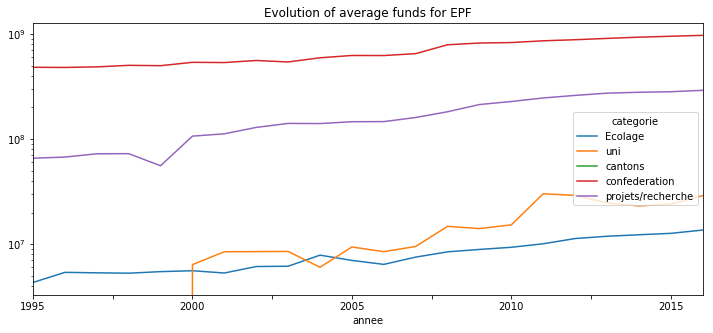

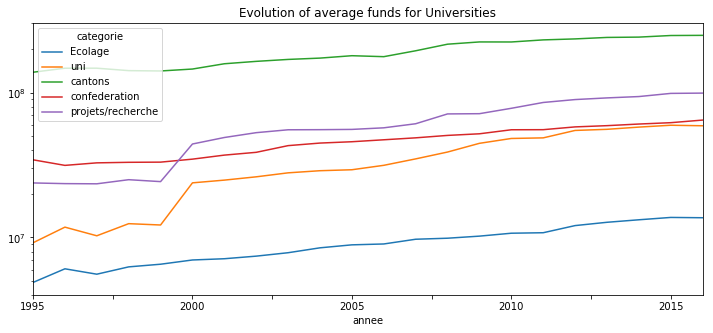

In [81]:
summ_EPF = get_df_charge_revenu('Moy_EPF', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
summ_EPF.plot(kind='line', legend = True, logy = True, figsize= (12, 5), 
              title = 'Evolution of average funds for EPF')
plt.show()
summ_uni = get_df_charge_revenu('Moy_UNI', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
summ_uni.plot(kind='line', legend = True, logy = True, figsize= (12, 5), 
              title = 'Evolution of average funds for Universities')
plt.show()

## 2. Charges

For this file and the following, we make the decision to group among the subjects of study. We made this decision as we consider that subjects are not always present in every university or EPF and that the funding is not fundamentally different for a subject or another. In this sense grouping helps us consider the operating costs of a university not detailing per subject, which we considerably decrease the amount of data that we have.

In [15]:
#Load file
charges = read_file('charges.px')
charges.index.names = ['annee', 'domaine', 'charge', 'fond']
charges.head()

BS  \
annee domaine       charge                 fond                                        
2003  1.1 Theologie Charges de personnel   Compte de la haute ecole  2691221.0000000   
                                           Fonds national suisse      345014.0000000   
                                           Autres fonds de tiers      705154.0000000   
                    Charges d'exploitation Compte de la haute ecole   383882.0000000   
                                           Fonds national suisse        4241.0000000   

                                                                                  BE  \
annee domaine       charge                 fond                                        
2003  1.1 Theologie Charges de personnel   Compte de la haute ecole  5729464.9000000   
                                           Fonds national suisse      197047.5000000   
                                           Autres fonds de tiers      251875.2000000   
                    Charges d'exploitation Compte de la haute ecole   513080.7000000   
                                           Fonds national suisse       61622.0500000   

                                                                                  FR  \
annee domaine       charge                 fond                                        
2003  1.1 Theologie Charges de personnel   Compte de la haute ecole  8230637.0000000   
                                           Fonds national suisse      721500.0000000   
                                           Autres fonds de tiers      177301.0000000   
                    Charges d'exploitation Compte de la haute ecole   780341.0000000   
                                           Fonds national suisse       31509.0000000   

                                                                                  GE  \
annee domaine       charge                 fond                                        
2003  1.1 Theologie Charges de personnel   Compte de la haute ecole  1310260.0000000   
                                           Fonds national suisse      317713.0000000   
                                           Autres fonds de tiers     2677041.0000000   
                    Charges d'exploitation Compte de la haute ecole  2383348.0000000   
                                           Fonds national suisse       37791.0000000   

                                                                                  LS  \
annee domaine       charge                 fond                                        
2003  1.1 Theologie Charges de personnel   Compte de la haute ecole  4170127.0000000   
                                           Fonds national suisse      289724.0000000   
                                           Autres fonds de tiers       83894.0000000   
                    Charges d'exploitation Compte de la haute ecole   333272.0000000   
                                           Fonds national suisse       10144.0000000   

                                                                                  LU  \
annee domaine       charge                 fond                                        
2003  1.1 Theologie Charges de personnel   Compte de la haute ecole  5158895.0000000   
                                           Fonds national suisse       55189.0000000   
                                           Autres fonds de tiers      120246.0000000   
                    Charges d'exploitation Compte de la haute ecole   474772.0000000   
                                           Fonds national suisse           0.0000000   

                                                                                  NE  \
annee domaine       charge                 fond                                        
2003  1.1 Theologie Charges de personnel   Compte de la haute ecole  1473818.0000000   
                                           Fonds national suisse       16546.0000000   
                            

In [16]:
#Parse values to float in columns
charges = parse_df(charges)
charges = charges.groupby(['annee', 'charge', 'fond']).sum()
charges.head()

BS  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      17723232.0   
                             Compte de la haute ecole   74595422.0   
                             Fonds national suisse      11055778.0   
      Charges de personnel   Autres fonds de tiers      23205463.0   
                             Compte de la haute ecole  181211561.0   

                                                                 BE  \
annee charge                 fond                                     
2003  Charges d'exploitation Autres fonds de tiers     2.517695e+07   
                             Compte de la haute ecole  1.733824e+08   
                             Fonds national suisse     1.424264e+07   
      Charges de personnel   Autres fonds de tiers     5.142001e+07   
                             Compte de la haute ecole  2.540764e+08   

                                                                FR  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      11849065.0   
                             Compte de la haute ecole   33668801.0   
                             Fonds national suisse       2211046.0   
      Charges de personnel   Autres fonds de tiers      12687987.0   
                             Compte de la haute ecole  125025405.0   

                                                                GE  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      54939330.0   
                             Compte de la haute ecole   96422670.0   
                             Fonds national suisse      22609829.0   
      Charges de personnel   Autres fonds de tiers      49313994.0   
                             Compte de la haute ecole  352261388.0   

                                                                LS  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      21406638.0   
                             Compte de la haute ecole   87756964.0   
                             Fonds national suisse       6703096.0   
      Charges de personnel   Autres fonds de tiers      43230500.0   
                             Compte de la haute ecole  180581084.0   

                                                               LU          NE  \
annee charge                 fond                                               
2003  Charges d'exploitation Autres fonds de tiers       484621.0   7799833.0   
                             Compte de la haute ecole   3177245.0  14835535.0   
                             Fonds national suisse        75001.0   3554128.0   
      Charges de personnel   Autres fonds de tiers      1082417.0  16026208.0   
                             Compte de la haute ecole  14568717.0  64565573.0   

                                                                SG  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      5019533.00   
                             Compte de la haute ecole  27704462.81   
                             Fonds national suisse         6299.19   
      Charges de personnel   Autres fonds de tiers     40243477.00   
                             Compte de la haute ecole  52296132.00   

                                                                UZH  \
annee charge                 fond                                     
2003  Charges d'exploitation Autres fonds de tiers     2.456149e+07   
                             Compte de la haute ecole  1.943345e+08   
                             Fonds national suisse     1.110585e+07   
      Charges de personnel   Autres fonds de tiers     6.258607e+07   
                             Compte de la haute ecole  4.812352e+08   

                                             

In [82]:
#Describe the data
charges_type = list(charges.index.get_level_values('charge').unique())
charges_fonds = list(charges.index.get_level_values('fond').unique())
charges_years = list(charges.index.get_level_values('annee').unique())
print("The charges are ", charges_type)
print("The funds are ", charges_fonds)
print("The range of time is : [", charges_years[0], ",", charges_years[-1],']')

The charges are  ["Charges d'exploitation", 'Charges de personnel', 'Frais de batiments']
The funds are  ['Autres fonds de tiers', 'Compte de la haute ecole', 'Fonds national suisse']
The range of time is : [ 2003 , 2016 ]


In [18]:
#Compute the averages
charges = compute_avg(charges)
charges.head()

Index(['EPFL', 'ETHZ', 'Moy_EPF', 'Moy_UNI'], dtype='object')


EPFL  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      24934797.0   
                             Compte de la haute ecole   91561402.0   
                             Fonds national suisse       5594963.0   
      Charges de personnel   Autres fonds de tiers      72439322.0   
                             Compte de la haute ecole  253046400.0   

                                                              ETHZ  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      43055498.0   
                             Compte de la haute ecole  167378506.0   
                             Fonds national suisse       7009998.0   
      Charges de personnel   Autres fonds de tiers      76049084.0   
                             Compte de la haute ecole  563857909.0   

                                                           Moy_EPF  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      33995147.5   
                             Compte de la haute ecole  129469954.0   
                             Fonds national suisse       6302480.5   
      Charges de personnel   Autres fonds de tiers      74244203.0   
                             Compte de la haute ecole  408452154.5   

                                                            Moy_UNI  
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers     1.545347e+07  
                             Compte de la haute ecole  6.527672e+07  
                             Fonds national suisse     6.521550e+06  
      Charges de personnel   Autres fonds de tiers     2.747356e+07  
                             Compte de la haute ecole  1.572936e+08

In [84]:
def get_df_charges(uni, summarized = True):
    #Create an dataframe with the charge types as columns
    uni_df = pd.DataFrame(columns = charges_type)
    #Set the year as index
    uni_df.insert(loc=0, column='annee', value=charges_years)
    uni_df = uni_df.set_index('annee')
    #Extract the charges for the given university
    tmp_df = charges[[uni]]
    if summarized:
        #Get rid of the funds detail to see the evolution of the costs
        tmp_df = tmp_df.groupby(['annee', 'charge']).sum()
        for y in charges_years:
            uni_df.loc[y] = list((tmp_df.loc[y][uni].reset_index())[uni])
        return uni_df
    else:
        return tmp_df

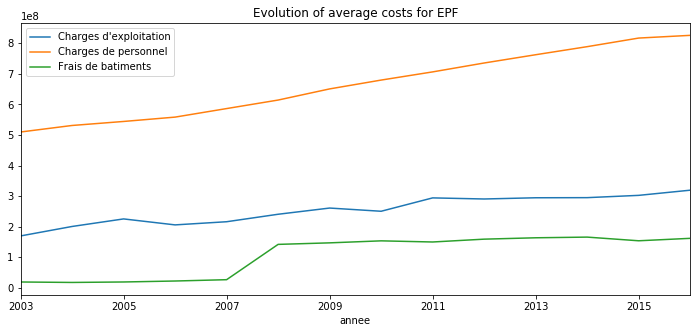

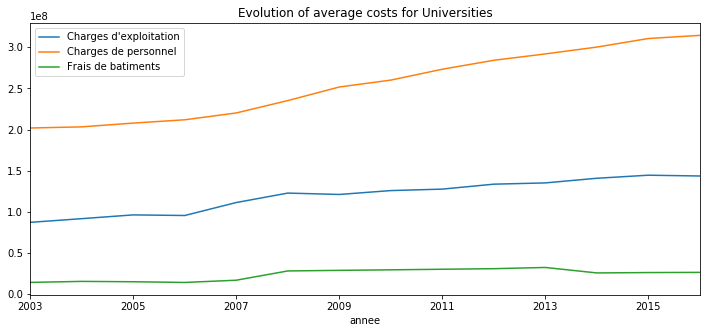

In [88]:
summ_EPF = get_df_charges('Moy_EPF', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
summ_EPF.plot(kind='line', legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average costs for EPF')
plt.show()
summ_uni = get_df_charges('Moy_UNI', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to False a logarithmic y axis
summ_uni.plot(kind='line', legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average costs for Universities')
plt.show()

## 3. Cout-revenu

In [21]:
#Load file
cout_revenu = read_file('cout-revenu.px')
cout_revenu.index.names = ['annee', 'domaine', 'poste', 'fond']
cout_revenu.head()

BS  \
annee domaine       poste                         fond                                                     
2010  1.1 Theologie Enseignement : etudes de base Revenus imputables                            48933.00   
                                                  Contributions des etudiants                  139244.00   
                                                  Couverture par la collectivite responsable  1514175.00   
                                                  Fonds de tiers                               323545.00   
                                                  Contributions AIU                            370731.00   

                                                                                                      BE  \
annee domaine       poste                         fond                                                     
2010  1.1 Theologie Enseignement : etudes de base Revenus imputables                           219362.07   
                                                  Contributions des etudiants                  247058.17   
                                                  Couverture par la collectivite responsable  1590403.73   
                                                  Fonds de tiers                               227239.79   
                                                  Contributions AIU                           1403349.30   

                                                                                                      FR  \
annee domaine       poste                         fond                                                     
2010  1.1 Theologie Enseignement : etudes de base Revenus imputables                           123651.00   
                                                  Contributions des etudiants                  182254.00   
                                                  Couverture par la collectivite responsable  2524910.63   
                                                  Fonds de tiers                                66904.00   
                                                  Contributions AIU                            555486.00   

                                                                                                      GE  \
annee domaine       poste                         fond                                                     
2010  1.1 Theologie Enseignement : etudes de base Revenus imputables                            93399.44   
                                                  Contributions des etudiants                  147882.41   
                                                  Couverture par la collectivite responsable  -537527.29   
                                                  Fonds de tiers                               365206.14   
                                                  Contributions AIU                            403760.89   

                                                                                                     LS  \
annee domaine       poste                         fond                                                    
2010  1.1 Theologie Enseignement : etudes de base Revenus imputables                           42796.90   
                                                  Contributions des etudiants                  58206.31   
                                                  Couverture par la collectivite responsable  917489.96   
                                                  Fonds de tiers                               60359.51   
                                                  Contributions AIU                           223955.70   

                                                                                                      LU  \
annee domaine       poste                         fond                                                     
2010  1.1 Theologie Enseignement : etudes de base Revenus imputables                           450788.00   


In [22]:
#Parse strings to float and group to get rid of subject detail
cout_revenu = parse_df(cout_revenu)
cout_revenu = cout_revenu.groupby(['annee', 'poste', 'fond']).sum()
cout_revenu.head()

BS  \
annee poste                         fond                                                     
2010  Enseignement : etudes de base Contributions AIU                           60557824.0   
                                    Contributions des etudiants                 12472229.0   
                                    Couverture par la collectivite responsable  53525716.0   
                                    Fonds de tiers                              16379455.0   
                                    Revenus imputables                           4752655.0   

                                                                                         BE  \
annee poste                         fond                                                      
2010  Enseignement : etudes de base Contributions AIU                           62615420.32   
                                    Contributions des etudiants                 14933632.07   
                                    Couverture par la collectivite responsable  60687316.30   
                                    Fonds de tiers                               3602685.02   
                                    Revenus imputables                           8471947.11   

                                                                                         FR  \
annee poste                         fond                                                      
2010  Enseignement : etudes de base Contributions AIU                           51488466.00   
                                    Contributions des etudiants                  9069345.00   
                                    Couverture par la collectivite responsable   5312877.16   
                                    Fonds de tiers                               4292522.00   
                                    Revenus imputables                           3037764.00   

                                                                                         GE  \
annee poste                         fond                                                      
2010  Enseignement : etudes de base Contributions AIU                           27166153.60   
                                    Contributions des etudiants                 12160093.80   
                                    Couverture par la collectivite responsable  50971088.36   
                                    Fonds de tiers                              52728992.61   
                                    Revenus imputables                           7553416.64   

                                                                                         LS  \
annee poste                         fond                                                      
2010  Enseignement : etudes de base Contributions AIU                           48660739.90   
                                    Contributions des etudiants                 10213435.01   
                                    Couverture par la collectivite responsable  38635675.62   
                                    Fonds de tiers                              12901564.17   
                                    Revenus imputables                           3981938.28   

                                                                                        LU  \
annee poste                         fond                                                     
2010  Enseignement : etudes de base Contributions AIU                           11327371.0   
                                    Contributions des etudiants                  3001879.0   
                                    Couverture par la collectivite responsable   4338962.0   
                                    Fonds de tiers                                281787.0   
                                    Revenus imputables                           1235166.0   

                                                                                        NE  \
annee poste 

In [89]:
#Describe content
revenu_postes = list(cout_revenu.index.get_level_values('poste').unique())
revenu_fonds = list(cout_revenu.index.get_level_values('fond').unique())
revenu_years = list(cout_revenu.index.get_level_values('annee').unique())
print("The different jobs are ", revenu_postes)
print("The funds are for exemple ", revenu_fonds[:5])
print("The range of time is : [", revenu_years[0], ",", revenu_years[-1],']')

The different jobs are  ['Enseignement : etudes de base', 'Enseignement : formation approfondie', 'Prestations de service', 'Recherche et developpement (RD)']
The funds are for exemple  ['Contributions AIU', 'Contributions des etudiants', 'Couverture par la collectivite responsable', 'Fonds de tiers', 'Revenus imputables']
The range of time is : [ 2010 , 2015 ]


In [24]:
#Computing the averages
cout_revenu = compute_avg(cout_revenu)
cout_revenu.head()

Index(['EPFL', 'ETHZ', 'Moy_EPF', 'Moy_UNI'], dtype='object')


EPFL  \
annee poste                         fond                                                       
2010  Enseignement : etudes de base Contributions AIU                           0.000000e+00   
                                    Contributions des etudiants                 5.933921e+06   
                                    Couverture par la collectivite responsable  1.509130e+08   
                                    Fonds de tiers                              0.000000e+00   
                                    Revenus imputables                          0.000000e+00   

                                                                                        ETHZ  \
annee poste                         fond                                                       
2010  Enseignement : etudes de base Contributions AIU                           0.000000e+00   
                                    Contributions des etudiants                 1.470390e+07   
                                    Couverture par la collectivite responsable  2.830384e+08   
                                    Fonds de tiers                              0.000000e+00   
                                    Revenus imputables                          0.000000e+00   

                                                                                     Moy_EPF  \
annee poste                         fond                                                       
2010  Enseignement : etudes de base Contributions AIU                           0.000000e+00   
                                    Contributions des etudiants                 1.031891e+07   
                                    Couverture par la collectivite responsable  2.169757e+08   
                                    Fonds de tiers                              0.000000e+00   
                                    Revenus imputables                          0.000000e+00   

                                                                                    Moy_UNI  
annee poste                         fond                                                     
2010  Enseignement : etudes de base Contributions AIU                           39770082.66  
                                    Contributions des etudiants                 10395830.70  
                                    Couverture par la collectivite responsable  24749918.27  
                                    Fonds de tiers                               9833063.04  
                                    Revenus imputables                           4674260.47

In [93]:
def get_df_cout_revenu(uni, summarized = True):
    #Creating a dataframe with the jobs as columns
    uni_df = pd.DataFrame(columns = revenu_postes)
    #Make the years as index
    uni_df.insert(loc=0, column='annee', value=revenu_years)
    uni_df = uni_df.set_index('annee')
    #Extracting the data for given university
    tmp_df = cout_revenu[[uni]]
    if summarized:
        #Get rid of the fund source detail
        tmp_df = tmp_df.groupby(['annee', 'poste']).sum()
        for y in revenu_years:
            uni_df.loc[y] = list((tmp_df.loc[y][uni].reset_index())[uni])
        #We create a category that gathers the 2 different "Teaching" categories
        uni_df['Enseignement'] = uni_df[['Enseignement : etudes de base',
 'Enseignement : formation approfondie']].sum(axis=1)
        return uni_df
    else:
        return tmp_df

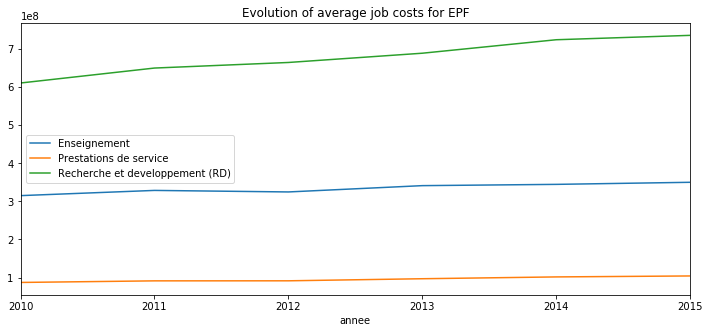

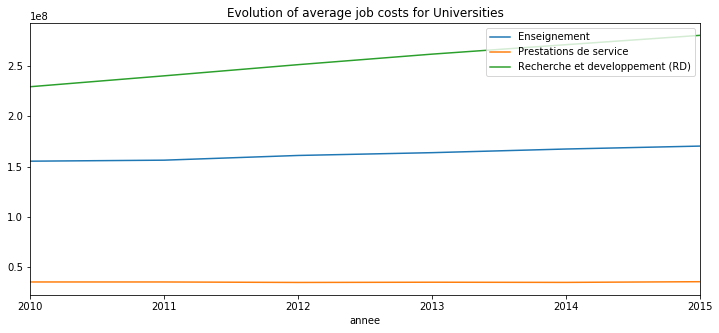

In [96]:
summ_EPF = get_df_cout_revenu('Moy_EPF', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
summ_EPF[['Enseignement', 'Prestations de service','Recherche et developpement (RD)']].plot(kind='line', 
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average job costs for EPF')
plt.show()
summ_uni = get_df_cout_revenu('Moy_UNI', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to False a logarithmic y axis
summ_uni[['Enseignement', 'Prestations de service','Recherche et developpement (RD)']].plot(kind='line',
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average job costs for Universities')
plt.show()

## 4. Diplome-bourses

In [29]:
#Load file
diplome_bourses = read_file('diplome-bourses.px')
diplome_bourses.index.names = ['annee', 'region', 'etude']
diplome_bourses.head(11)

Montant verse en frs  \
annee region etude                                                                     
2004  Suisse Degres de formation - Total                                   279331456   
             Scolarite obligatoire                                            702606   
             Maturite gymnasiale                                            31538221   
             Autres formations generales                                    19119665   
             Formation professionnelle initiale (e plein temps)             28730192   
             Formation professionnelle initiale (duale)                     43206126   
             Maturite professionnelle (apres l'apprentissage)                2615122   
             Formation professionnelle superieure                           18765970   
             Hautes ecoles specialisees et pedagogiques                     42855197   
             Hautes ecoles universitaires                                   87804126   
             Formation continue                                              3994231   

                                                                Nombre de beneficiaires  
annee region etude                                                                       
2004  Suisse Degres de formation - Total                                          49496  
             Scolarite obligatoire                                                  214  
             Maturite gymnasiale                                                   7792  
             Autres formations generales                                           4969  
             Formation professionnelle initiale (e plein temps)                    6093  
             Formation professionnelle initiale (duale)                           10104  
             Maturite professionnelle (apres l'apprentissage)                       613  
             Formation professionnelle superieure                                  2397  
             Hautes ecoles specialisees et pedagogiques                            6019  
             Hautes ecoles universitaires                                         11775  
             Formation continue                                                     663

In [90]:
#Describe the content
bourse_region = list(diplome_bourses.index.get_level_values('region').unique())
bourse_etude = list(diplome_bourses.index.get_level_values('etude').unique())
bourse_years = list(diplome_bourses.index.get_level_values('annee').unique())
print("The different regions are ", bourse_region[:5])
print("The different level of diploma are ", bourse_etude[:5])
print("The range of time is : [", bourse_years[0], ",", bourse_years[-1],']')

The different regions are  ['Suisse', 'Zurich', 'Bern / Berne', 'Luzern', 'Uri']
The different level of diploma are  ['Degres de formation - Total', 'Scolarite obligatoire', 'Maturite gymnasiale', 'Autres formations generales', 'Formation professionnelle initiale (e plein temps)']
The range of time is : [ 2004 , 2016 ]


In [30]:
#This function returns the dataframe for the given region and level of diploma
#By default we look at the Swiss level and the university level
def get_df_bourse(region = 'Suisse', etude ='Hautes ecoles universitaires'):
    #Extracting both levels of region and study
    tmp_df = diplome_bourses.xs(region, level = 'region', axis = 0)
    tmp_df = tmp_df.xs(etude, level = 'etude', axis = 0)
    #Parse strings to float
    tmp_df = parse_df(tmp_df)
    #Compute the amount of a scholarship (total amount in CHF / number of people receiving one)
    tmp_df['Montant bourse'] = tmp_df['Montant verse en frs'] / tmp_df['Nombre de beneficiaires']
    return tmp_df

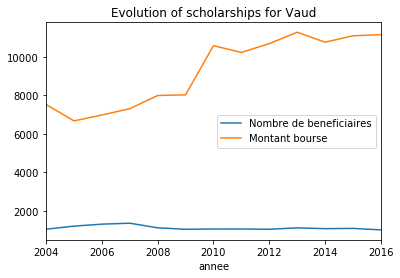

In [100]:
bourse_uni = get_df_bourse('Vaud')
bourse_uni[['Nombre de beneficiaires', 'Montant bourse']].plot(kind = 'line', logy = False,
            title = 'Evolution of scholarships for Vaud')
plt.show()

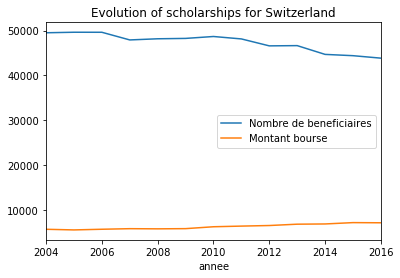

In [99]:
bourse_total = get_df_bourse('Suisse', 'Degres de formation - Total')
bourse_total[['Nombre de beneficiaires', 'Montant bourse']].plot(kind = 'line', logy = False,
                           title = 'Evolution of scholarships for Switzerland' )
plt.show()

## 5. Diplomes

In [34]:
#Load file
diplomes = read_file('diplomes.px')
diplomes.index.names = ['annee', 'diplome', 'filiere', 'nationalite']
diplomes.head(5)

BS BE FR GE LS LU NE SG UZH USI  \
annee diplome  filiere       nationalite                                   
1993  Bachelor Mathematiques Suisses      0  0  0  0  0  0  0  0   0   0   
                             Etrangers    0  0  0  0  0  0  0  0   0   0   
               Informatique  Suisses      0  0  0  0  0  0  0  0   0   0   
                             Etrangers    0  0  0  0  0  0  0  0   0   0   
               Astronomie    Suisses      0  0  0  0  0  0  0  0   0   0   

                                         Autres IU EPFL ETHZ  
annee diplome  filiere       nationalite                      
1993  Bachelor Mathematiques Suisses             0    0    0  
                             Etrangers           0    0    0  
               Informatique  Suisses             0    0    0  
                             Etrangers           0    0    0  
               Astronomie    Suisses             0    0    0

In [101]:
#Describe the content
diplome_type = list(diplomes.index.get_level_values('diplome').unique())
diplome_years = list(diplomes.index.get_level_values('annee').unique())
print("The different diplomas are ", diplome_type)
print("The range of time is : [", diplome_years[0], ",", diplome_years[-1],']')

The different diplomas are  ['Bachelor', 'Doctorats', 'Licences/Diplomes', 'Master']
The range of time is : [ 1993 , 2016 ]


In [36]:
#Parse strings to float and group to get rid of subject detail
diplomes = parse_df(diplomes)
diplomes = diplomes.groupby(['annee', 'diplome', 'nationalite']).sum()

In [37]:
#Computing the averages
diplomes = compute_avg(diplomes)
diplomes.tail(10)

Index(['EPFL', 'ETHZ', 'Moy_EPF', 'Moy_UNI'], dtype='object')


EPFL    ETHZ  Moy_EPF  Moy_UNI
annee diplome           nationalite                                 
2015  Master            Etrangers    442.0   601.0    521.5    40.45
                        Suisses      458.0   968.0    713.0    71.91
2016  Bachelor          Etrangers    421.0   273.0    347.0    21.27
                        Suisses      508.0  1123.0    815.5    85.36
      Doctorats         Etrangers    334.0   500.0    417.0    48.55
                        Suisses       64.0   244.0    154.0    21.09
      Licences/Diplomes Etrangers      0.0     0.0      0.0     0.00
                        Suisses        0.0     0.0      0.0     0.00
      Master            Etrangers    419.0   618.0    518.5    37.91
                        Suisses      519.0  1072.0    795.5    71.27

In [103]:
def get_df_diplome(uni, summarized = True):
    #Create a dataframe with the diploma type as columns
    uni_df = pd.DataFrame(columns = diplome_type)
    #Make the years the index
    uni_df.insert(loc=0, column='annee', value=diplome_years)
    uni_df = uni_df.set_index('annee')
    #Extract the information about the given uni
    tmp_df = diplomes[[uni]]
    if summarized:
        #Get rid of the nationality information
        tmp_df = tmp_df.groupby(['annee', 'diplome']).sum()
        for y in diplome_years:
            uni_df.loc[y] = list((tmp_df.loc[y][uni].reset_index())[uni])
        #Compute the total number of diplomas
        uni_df['Total'] = uni_df[diplome_type].sum(axis=1)
        return uni_df
    else:
        return tmp_df

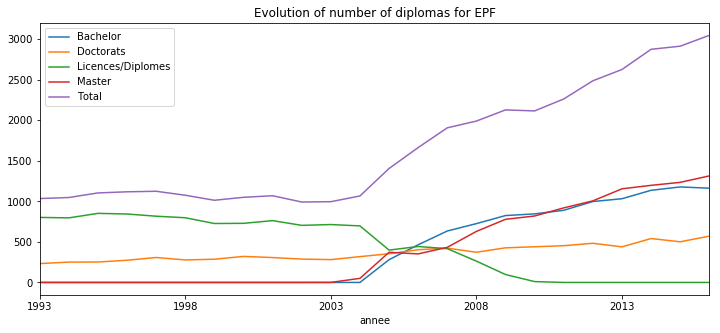

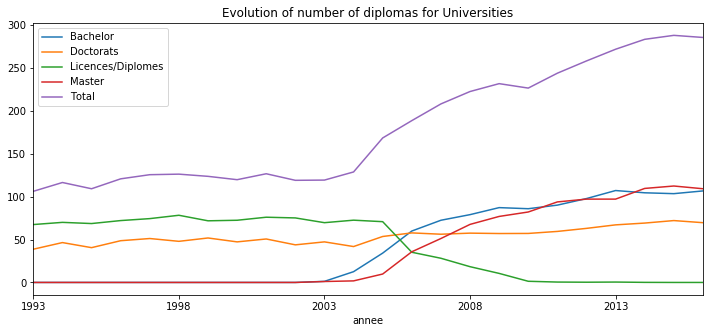

In [104]:
summ_EPF = get_df_diplome('Moy_EPF', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
summ_EPF.plot(kind='line', 
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of number of diplomas for EPF')
plt.show()
summ_uni = get_df_diplome('Moy_UNI', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to False a logarithmic y axis
summ_uni.plot(kind='line',
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of number of diplomas for Universities')
plt.show()

We have trouble understanding the data from this file. Indeed some values are set to 0 and we cannot find a reasonable explanation for it. <br>
First we don't really get what is meant by "Licences/Diplomes". It seems to be the Bachelor and Master sum before those terms were used. Though the transition slow which does not seem to be a change of name (this could be changed from year to the next as we have federal data). <br>
The total value make more sense but it would be wrong to consider the PHD students as they don't pay Tuition fees. <br>
We decided to stop taking this dataset into account as it does not bring many more insight to the number of students.

## 6. Etudiants-entrant

In [40]:
#Load file
etudiants_entrant = read_file('etudiants-entrant.px')
etudiants_entrant.index.names = ['annee', 'filiere', 'nationalite']
etudiants_entrant.head()

BS  BE  FR GE  LS  LU NE  \
annee filiere                         nationalite                             
1992  Theologie protestante           Suisse        7  24   0  6  10   0  3   
                                      Etranger     26   6   0  4   4   0  3   
      Theologie catholique-romaine    Suisse        0   0  21  0   0  28  0   
                                      Etranger      0   0  48  0   0   8  0   
      Theologie catholique-chretienne Suisse        0   1   0  0   0   0  0   

                                                  SG UZH USI EPFL ETHZ  \
annee filiere                         nationalite                        
1992  Theologie protestante           Suisse       0  23   0    0    0   
                                      Etranger     0   8   0    0    0   
      Theologie catholique-romaine    Suisse       0   0   0    0    0   
                                      Etranger     0   0   0    0    0   
      Theologie catholique-chretienne Suisse       0   0   0    0    0   

                                                  Autres IU  
annee filiere                         nationalite            
1992  Theologie protestante           Suisse              0  
                                      Etranger            0  
      Theologie catholique-romaine    Suisse              0  
                                      Etranger            0  
      Theologie catholique-chretienne Suisse              0

In [109]:
#Describe the content
nbentrant_years = list(etudiants_entrant.index.get_level_values('annee').unique())
print("We distinguish the nationaliy by Swiss or Foreigner.")
print("The range of time is : [", nbentrant_years[0], ",", nbentrant_years[-1],']')

We distinguish the nationaliy by Swiss or Foreigner.
The range of time is : [ 1992 , 2016 ]


In [42]:
#Parse strings to float and group to get rid of subject detail
etudiants_entrant = parse_df(etudiants_entrant)
etudiants_entrant = etudiants_entrant.groupby(['annee', 'nationalite']).sum()

In [43]:
#Computing the means
etudiants_entrant = compute_avg(etudiants_entrant)
etudiants_entrant.head()

Index(['EPFL', 'ETHZ', 'Moy_EPF', 'Moy_UNI'], dtype='object')


EPFL    ETHZ  Moy_EPF  Moy_UNI
annee nationalite                                 
1992  Etranger     237.0   250.0    243.5   259.18
      Suisse       558.0  1486.0   1022.0   843.00
1993  Etranger     244.0   258.0    251.0   255.36
      Suisse       587.0  1531.0   1059.0   853.91
1994  Etranger     225.0   391.0    308.0   216.36

In [106]:
def get_df_nbentrant(uni):
    #Create a dataframe with the different nationality as columns
    uni_df = pd.DataFrame(columns = ['Etranger', 'Suisse'])
    #Make the years as index
    uni_df.insert(loc=0, column='annee', value=nbentrant_years)
    uni_df = uni_df.set_index('annee')
    #Extract data for our university
    tmp_df = etudiants_entrant[[uni]]
    for y in nbentrant_years:
        uni_df.loc[y] = list((tmp_df.loc[y][uni].reset_index())[uni])
    #Compute the total value
    uni_df['Total'] = uni_df[['Etranger', 'Suisse']].sum(axis=1)
    return uni_df

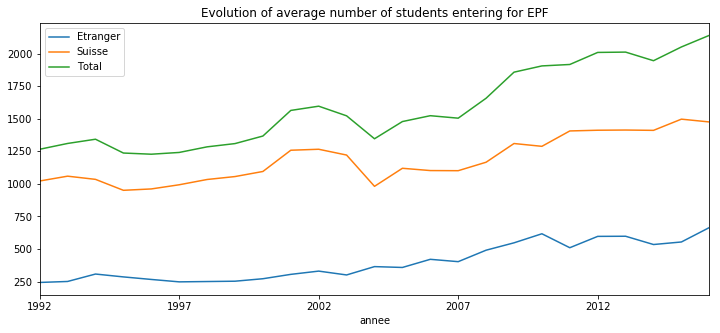

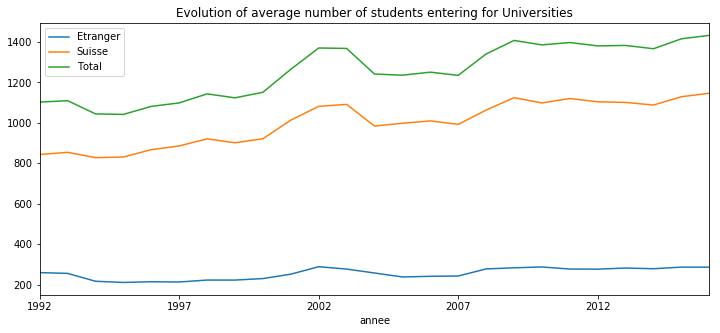

In [108]:
summ_EPF = get_df_nbentrant('Moy_EPF')
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
summ_EPF.plot(kind='line', 
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average number of students entering for EPF')
plt.show()
summ_uni = get_df_nbentrant('Moy_UNI')
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to False a logarithmic y axis
summ_uni.plot(kind='line',
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average number of students entering for Universities')
plt.show()

## 7. Nb-bourses

In [46]:
#Load file
nb_bourses = read_file('nb-bourses.px')
nb_bourses.index.names = ['annee', 'region', 'sexe']
nb_bourses.head()

Moins de 15 ans 15-19 ans 20-24 ans 25-29 ans  \
annee region       sexe                                                  
2004  Suisse       Homme             116      9599      8291      3635   
                   Femme             137     11896      9554      3146   
      Zurich       Homme              66       601       527       385   
                   Femme              84       699       607       354   
      Bern / Berne Homme               1      2174      1024       271   

                         30 ans ou plus  
annee region       sexe                  
2004  Suisse       Homme           1504  
                   Femme           1618  
      Zurich       Homme            213  
                   Femme            278  
      Bern / Berne Homme             78

In [110]:
#Describe the content
nbbourse_region = list(nb_bourses.index.get_level_values('region').unique())
nbbourse_years = list(nb_bourses.index.get_level_values('annee').unique())
print("The regions are for example : ", nbbourse_region[:5])
print("The range of time is : [",nbbourse_years[0], ",", nbbourse_years[-1],']')

The regions are for example :  ['Suisse', 'Zurich', 'Bern / Berne', 'Luzern', 'Uri']
The range of time is : [ 2004 , 2016 ]


In [48]:
#We will not take into account the sex of the person that receive the scholarship
#This function computes the total number of persons having scholarship, per age, region and year
def merge_sexe(df):
    for y in nbbourse_years:
        for c in nbbourse_region:
            #For every year and region compute in the Man line the sum of Man and Woman values
            df.loc[(y, c, 'Homme')] =  df.loc[(y,c, 'Homme')].astype(int) + df.loc[(y, c, 'Femme')].astype(int)
    #Drop the useless row
    df = df.drop('Femme', level = 'sexe')
    #Reset the sex index and delete the corresponding column
    df = df.reset_index(level=2)
    df = df.drop('sexe', axis =1)
    return df

In [49]:
#This function gathers some step we apply to the bourse dataframe
def process_df(nb_bourses):
    #Parse strings to float
    nb_bourses = parse_df(nb_bourses)
    #Aggregate the values according to sex
    bourses = merge_sexe(nb_bourses)
    #Aggregate the values accordint to age class
    bourses['Total'] = bourses[bourses.columns].sum(axis = 1)
    return bourses

In [50]:
#Get the dataframe in appropriate format
bourse = process_df(nb_bourses)
bourse.head()

Moins de 15 ans  15-19 ans  20-24 ans  25-29 ans  \
annee region                                                           
2004  Suisse                  253.0    21495.0    17845.0     6781.0   
      Zurich                  150.0     1300.0     1134.0      739.0   
      Bern / Berne              1.0     4717.0     2162.0      484.0   
      Luzern                    2.0      726.0      859.0      311.0   
      Uri                       0.0       65.0       73.0       49.0   

                    30 ans ou plus    Total  
annee region                                 
2004  Suisse                3122.0  49496.0  
      Zurich                 491.0   3814.0  
      Bern / Berne           153.0   7517.0  
      Luzern                 137.0   2035.0  
      Uri                     14.0    201.0

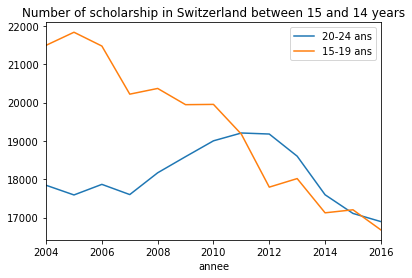

In [120]:
#Pick the region you want ot analyse
tmp_df = bourse.xs('Suisse', level = 'region', axis = 0)
#Pick the age class/es you want
classes = ['20-24 ans', '15-19 ans']
tmp_df[classes].plot(kind = 'line', logy= False,
                     title = 'Number of scholarship in Switzerland between 15 and 14 years')
plt.show()

## 8. Nb-etudiants

In [52]:
#Load file
nb_etudiants = read_file('nb-etudiants.px')
nb_etudiants.index.names = ['annee', 'filiere', 'nationalite']
nb_etudiants.head()

BS   BE   FR  GE  LS   LU  \
annee filiere                         nationalite                               
1993  Theologie protestante           Suisse       105  211    0  50  72    0   
                                      Etranger      63   42    0  32  21    0   
      Theologie catholique-romaine    Suisse         0    0  226   0   0  153   
                                      Etranger       0    0  252   0   0   32   
      Theologie catholique-chretienne Suisse         0    9    0   0   0    0   

                                                   NE SG  UZH USI EPFL ETHZ  \
annee filiere                         nationalite                             
1993  Theologie protestante           Suisse       43  0  227   0    0    0   
                                      Etranger     15  0   38   0    0    0   
      Theologie catholique-romaine    Suisse        0  0    0   0    0    0   
                                      Etranger      0  0    0   0    0    0   
      Theologie catholique-chretienne Suisse        0  0    0   0    0    0   

                                                  Autres IU  
annee filiere                         nationalite            
1993  Theologie protestante           Suisse              0  
                                      Etranger            0  
      Theologie catholique-romaine    Suisse              0  
                                      Etranger            0  
      Theologie catholique-chretienne Suisse              0

In [53]:
#Describe the content
nbetu_filiere = list(nb_etudiants.index.get_level_values('filiere').unique())
nbetu_years = list(nb_etudiants.index.get_level_values('annee').unique())
print("The range of time is : [", revenu_years[0], ",", revenu_years[-1],']')

In [54]:
#Parse strings to float and group to get rid of subject detail
nb_etudiants = parse_df(nb_etudiants)
nb_etudiants = nb_etudiants.groupby(['annee', 'nationalite']).sum()
nb_etudiants.head()

BS      BE      FR      GE      LS     LU      NE  \
annee nationalite                                                          
1993  Etranger     1421.0   650.0  1742.0  4975.0  1935.0   34.0   694.0   
      Suisse       6517.0  9585.0  6121.0  8826.0  6550.0  181.0  2484.0   
1994  Etranger     1435.0   664.0  1727.0  4710.0  1975.0   30.0   710.0   
      Suisse       6591.0  9426.0  6710.0  8775.0  6756.0  189.0  2522.0   
1995  Etranger     1425.0   636.0  1676.0  4355.0  1985.0   34.0   676.0   

                       SG      UZH  USI    EPFL    ETHZ  Autres IU  
annee nationalite                                                   
1993  Etranger     1221.0   2145.0  0.0  1425.0  1985.0       12.0  
      Suisse       2939.0  16982.0  0.0  3035.0  9388.0      190.0  
1994  Etranger     1231.0   1873.0  0.0  1462.0  2225.0       11.0  
      Suisse       2862.0  14533.0  0.0  3177.0  9467.0      201.0  
1995  Etranger     1205.0   1858.0  0.0  1440.0  2216.0       11.0

In [55]:
#Computing the means
nb_etudiants = compute_avg(nb_etudiants)
nb_etudiants.head()

Index(['EPFL', 'ETHZ', 'Moy_EPF', 'Moy_UNI'], dtype='object')


EPFL    ETHZ  Moy_EPF  Moy_UNI
annee nationalite                                  
1993  Etranger     1425.0  1985.0   1705.0  1348.09
      Suisse       3035.0  9388.0   6211.5  5488.64
1994  Etranger     1462.0  2225.0   1843.5  1306.00
      Suisse       3177.0  9467.0   6322.0  5324.09
1995  Etranger     1440.0  2216.0   1828.0  1260.09

In [121]:
def get_df_etudiant(uni):
    #Create a dataframe with the nationality as column
    uni_df = pd.DataFrame(columns = ['Etranger', 'Suisse'])
    #Make the years as index
    uni_df.insert(loc=0, column='annee', value=nbetu_years)
    uni_df = uni_df.set_index('annee')
    #Extract the data for given uni
    tmp_df = nb_etudiants[[uni]]
    for y in nbetu_years:
        uni_df.loc[y] = list((tmp_df.loc[y][uni].reset_index())[uni])
    #Compute the total per year
    uni_df['Total'] = uni_df[['Etranger', 'Suisse']].sum(axis=1)
    return uni_df

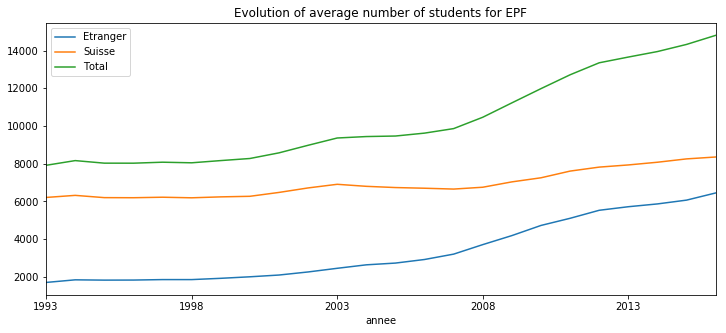

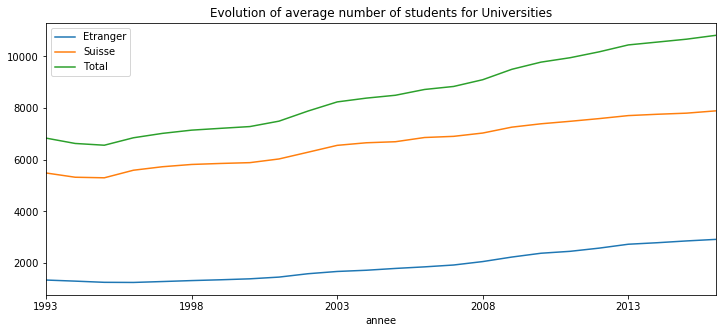

In [122]:
summ_EPF = get_df_etudiant('Moy_EPF')
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
summ_EPF.plot(kind='line', 
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average number of students for EPF')
plt.show()
summ_uni = get_df_etudiant('Moy_UNI')
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to False a logarithmic y axis
summ_uni.plot(kind='line',
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average number of students for Universities')
plt.show()

## 9. Pred-etudiants

In [124]:
#Load file
pred_etudiants = read_file('pred-etudiants.px')
pred_etudiants.index.names = ['scenario', 'uni','filiere','diplome', 'nationalite', 'annee']
pred_etudiants.head()

Etudiants  \
scenario              uni       filiere                        diplome  nationalite                 annee             
Scenario de reference Uni Basel 1 Sciences humaines + sociales Bachelor Certificat d'acces etranger 2015        289   
                                                                                                    2016        283   
                                                                                                    2017        289   
                                                                                                    2018        299   
                                                                                                    2019        303   

                                                                                                          Premiers titres  
scenario              uni       filiere                        diplome  nationalite                 annee                  
Scenario de reference Uni Basel 1 Sciences humaines + sociales Bachelor Certificat d'acces etranger 2015               61  
                                                                                                    2016               58  
                                                                                                    2017               50  
                                                                                                    2018               50  
                                                                                                    2019               53

In [125]:
#Describe the content
predetu_years = list(pred_etudiants.index.get_level_values('annee').unique())
predetu_scenarios = list(pred_etudiants.index.get_level_values('scenario').unique())
predetu_unis = list(pred_etudiants.index.get_level_values('uni').unique())
predetu_diplomes = list(pred_etudiants.index.get_level_values('diplome').unique())
predetu_nationalite = list(pred_etudiants.index.get_level_values('nationalite').unique())
print("The different scenarios of the prediction are ", predetu_scenarios)
print("The diplomas in consideration are ", predetu_diplomes)
print("The different nationalities are given by ", predetu_nationalite)
print("The range of time is : [", predetu_years[0], ",", predetu_years[-1],']')

The different scenarios of the prediction are  ['Scenario de reference', 'Scenario haute', 'Scenario base']
The diplomas in consideration are  ['Bachelor', 'Licence/diplome', 'Master']
The different nationalities are given by  ["Certificat d'acces etranger", "Certificat d'acces suisse"]
The range of time is : [ 2015 , 2025 ]


In [126]:
#Parse strings to float and group to get rid of subject detail
pred_etudiants = parse_df(pred_etudiants)
pred_etudiants = pred_etudiants.groupby(['scenario', 'uni', 'nationalite', 'annee']).sum()
pred_etudiants = pred_etudiants.drop(labels = 'Premiers titres', axis = 1)

In [127]:
#Computing the means
#We cannot use our usefull function as the university is in the index
#We compute first a dataframe with the data of all universities (exclude both EPF)
pred_etu_unis = pred_etudiants.iloc[pred_etudiants.index.get_level_values('uni') != 'EPF Lausanne']
pred_etu_unis = pred_etu_unis.iloc[pred_etu_unis.index.get_level_values('uni') != 'EPF Zurich']
#We compute then a dataframe with only the data of both EPF
pred_etu_epfs = pred_etudiants.iloc[pred_etudiants.index.get_level_values('uni') == 'EPF Lausanne']
pred_etu_epfs = pred_etu_epfs.append(pred_etudiants.iloc[pred_etudiants.index.get_level_values('uni') == 'EPF Zurich'])

In [128]:
#This function adds to pred_etudiants the mean of the extract_df with the given name in index
def add_mean(extract_df, name):
    #Compute the mean and reset the index
    mean_df = np.round(extract_df.mean(level = ['scenario','nationalite', 'annee'])).reset_index()
    #Inset a column with the name value
    mean_df.insert(loc=1, column = 'uni', value= name)
    #Set the index with the newly created column insert in correct place (accoring to pred_etudiant)
    mean_df = mean_df.set_index(['scenario', 'uni', 'nationalite', 'annee'])
    #Append the mean_df
    return pred_etudiants.append(mean_df)

In [150]:
#We build our final dataframe based on both values of EPF
pred_etudiants = pred_etu_epfs
#We add the EPF mean
pred_etudiants = add_mean(pred_etu_epfs, 'Moy_EPF')
#We add the universities mean
pred_etudiants = add_mean(pred_etu_unis, 'Moy_UNI')
pred_etudiants.head()

Etudiants
scenario      uni          nationalite                 annee           
Scenario base EPF Lausanne Certificat d'acces etranger 2015      3346.0
                                                       2016      3408.0
                                                       2017      3402.0
                                                       2018      3339.0
                                                       2019      3300.0

In [151]:
def get_df_predetu(uni, summarized = False):
    #Create a dataframe with columns according to the 3 scenarios of estimation and nationality
    uni_df = pd.DataFrame(columns = ['ET-bas','CH-bas','ET-ref','CH-ref','ET-haut','CH-haut'])
    #Insert year as index
    uni_df.insert(loc=0, column='annee', value= predetu_years)
    uni_df = uni_df.set_index('annee')
    #extract the data of given university
    tmp_df = pred_etudiants.xs(uni, level = 'uni')
    for y in predetu_years:
        uni_df.loc[y] = list(tmp_df.xs(y, level = 'annee').reset_index()['Etudiants'])
    return uni_df

In [152]:
#Quick check that for a nationality : bas < ref < haut
get_df_predetu('Moy_EPF').head(3)

,ET-bas,CH-bas,ET-ref,CH-ref,ET-haut,CH-haut
annee,,,,,,
2015,3260,7562,3260,7562,3260,7562
2016,3278,7704,3334,7750,3410,7796
2017,3252,7861,3350,7939,3492,8014


In [153]:
#For this file we searched a fancier visualisation
def plot_for_uni(uni, target):
    #Retrieve the data
    tmp_df = get_df_predetu(uni)
    #Parse the years as int
    x = [int(y) for y in predetu_years]
    #Plot the 2 lines of reference estimation
    plt.plot(predetu_years, tmp_df['CH-ref'],
            predetu_years, tmp_df['ET-ref'])
    #Fill the area between low and high estimation to suggest intervals
    plt.fill_between(x, tmp_df['CH-haut'], tmp_df['CH-bas'], facecolor='blue', alpha = .2)
    plt.fill_between(x, tmp_df['ET-haut'], tmp_df['ET-bas'], facecolor='orange', alpha = .2)
    plt.title(('Average estimations for ' +target))
    plt.legend(['Swiss', 'Foreigner'])
    plt.show()

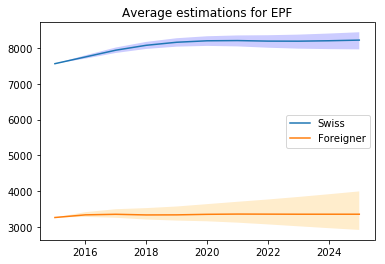

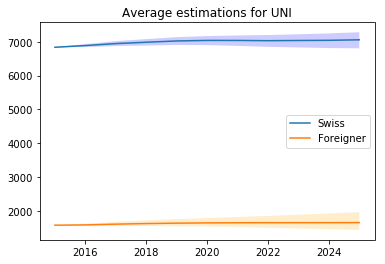

In [154]:
plot_for_uni('Moy_EPF', 'EPF')
plot_for_uni('Moy_UNI', 'UNI')

## 10. Staff

In [68]:
#Load file
staff = read_file('staff.px')
staff.index.names = ['annee', 'filiere','role']
staff.head()

BS  BE  FR  \
annee filiere       role                                                     
1994  1.1 Theologie Professeurs                                  9  13  27   
                    Autres enseignants                           9  14   9   
                    Assistants et collaborateurs scientifiques  13  22  57   
                    Direction, personnel admin-techn.            4   6  33   
                    Inconnu                                      0   0   0   

                                                                GE  LS LU  NE  \
annee filiere       role                                                        
1994  1.1 Theologie Professeurs                                 10  11  0   5   
                    Autres enseignants                           7  10  0   8   
                    Assistants et collaborateurs scientifiques  16  21  0  11   
                    Direction, personnel admin-techn.            5   2  0   4   
                    Inconnu                                      0   0  0   0   

                                                               SG UZH USI  \
annee filiere       role                                                    
1994  1.1 Theologie Professeurs                                 0  12   0   
                    Autres enseignants                          2  31   0   
                    Assistants et collaborateurs scientifiques  0  23   0   
                    Direction, personnel admin-techn.           0  15   0   
                    Inconnu                                     0   0   0   

                                                               FS-CH IUKB  \
annee filiere       role                                                    
1994  1.1 Theologie Professeurs                                    0    0   
                    Autres enseignants                             0    0   
                    Assistants et collaborateurs scientifiques     0    0   
                    Direction, personnel admin-techn.              0    0   
                    Inconnu                                        0    0   

                                                               EPFL ETHZ  
annee filiere       role                                                  
1994  1.1 Theologie Professeurs                                   0    0  
                    Autres enseignants                            0    0  
                    Assistants et collaborateurs scientifiques    0    0  
                    Direction, personnel admin-techn.             0    0  
                    Inconnu                                       0    0

In [157]:
#Describe the content
staff_years = list(staff.index.get_level_values('annee').unique())
staff_roles = list(staff.index.get_level_values('role').unique())
print("The different roles are for exemple ", staff_roles[:-2])
print("The range of time is : [", staff_years[0], ",", staff_years[-1],']')

The different roles are for exemple  ['Assistants et collaborateurs scientifiques', 'Autres enseignants', 'Direction, personnel admin-techn.']
The range of time is : [ 1994 , 2016 ]


In [70]:
#Parse strings to float and group to get rid of subject detail
staff = parse_df(staff)
staff = staff.groupby(['annee', 'role']).sum()

In [71]:
#Computing the means
staff = compute_avg(staff)
staff.head()

Index(['EPFL', 'ETHZ', 'Moy_EPF', 'Moy_UNI'], dtype='object')


EPFL    ETHZ  Moy_EPF  \
annee role                                                                  
1994  Assistants et collaborateurs scientifiques  1592.0  4687.0   3139.5   
      Autres enseignants                            34.0   442.0    238.0   
      Direction, personnel admin-techn.            753.0  2528.0   1640.5   
      Inconnu                                        0.0     0.0      0.0   
      Professeurs                                  153.0   337.0    245.0   

                                                  Moy_UNI  
annee role                                                 
1994  Assistants et collaborateurs scientifiques   745.08  
      Autres enseignants                           374.67  
      Direction, personnel admin-techn.            629.50  
      Inconnu                                       70.83  
      Professeurs                                  173.42

In [159]:
def get_df_staff(uni):
    #Create a dataframe with staff roles as columns
    uni_df = pd.DataFrame(columns = staff_roles)
    #Make year as index
    uni_df.insert(loc=0, column='annee', value=staff_years)
    uni_df = uni_df.set_index('annee')
    #Extract the data for given uni
    tmp_df = staff[[uni]]
    for y in staff_years:
        uni_df.loc[y] = list(tmp_df.xs(y, level = 'annee').reset_index()[uni])
    #Compute the total number of staff
    uni_df['Total'] = uni_df[uni_df.columns].sum(axis = 1)
    return uni_df

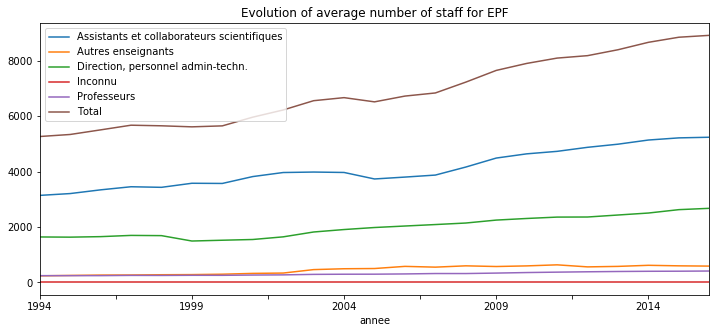

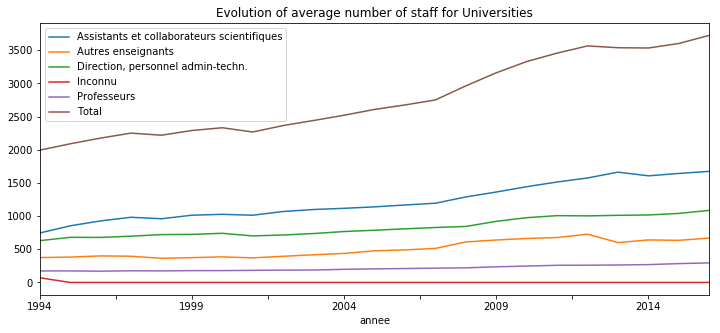

In [160]:
summ_EPF = get_df_staff('Moy_EPF')
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
summ_EPF.plot(kind='line', 
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average number of staff for EPF')
plt.show()
summ_uni = get_df_staff('Moy_UNI')
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to False a logarithmic y axis
summ_uni.plot(kind='line',
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average number of staff for Universities')
plt.show()